In [ ]:
""""
Created on Sept 2020

Data Science: Python - DAT-5301 - MsBA3

Team 12: Ji Sung Jung, Mayank Taggar, Paola Avellanet, Percival Sibanda and Raquel Calháo
"""

# <b> &nbsp;&nbsp;Overview </b>

<div style = "width:image width px; font-size:80%; text-align:center;"><img src="./images/Mexico.jpeg"
" width="800" height="800" style="padding-bottom:0.5em;"> <em>Figure 1: North America </em></div>

<br> Welcome to America a continent full of diversity and history. Starting in North America there’s Canada the biggest country in the Western Hemisphere a country known for its progressive political culture. Rich in nature one of their most famous sights being the Niagara Falls bordering Ontario and New York. United States the only country bordering Canada so close yet so different in many aspects. The United States is a country build on immigrants thus becoming “land of the free” known around the world for welcoming different countries. This concept has been distorted in the last couple of years but hopefully will return to its original “glory”. Most of the immigrants in the USA come from Latin America since it shared the border with Mexico. Latin America is a culture full of hospitality and warmth known for their great music and the amazing dance moves that go with it. Fostering one of the seven wonders of the world Chichen Itza a pre-Columbian city built by the Maya people in Yucatán, Mexico.
<br>


# <b> &nbsp;&nbsp;Obscure findings in the data. </b>

<br>
During our analysis into the dataset we had been given we noticed that a large chuck of Bermuda’s data was missing. When we investigated into this country, we found out some interesting things. Firstly, we were only able to find a few missing values through research, but a lot of the data was still missing. This led us to suspect that they were not being released due to other reasons. Once we looked into the background of Bermuda, we found facts and figures that changed our initial perception of the data. 
<br><br>
Boasting one of the highest per capita incomes in the world you would assume that they are a specialized skilled country but this is due to the offshore financial services for non-resident firms, especially in the Insurance sector, and it being a popular international tourism destination. Further investigation into their labor force revealed a much more interesting picture in which we were able to see what industries and sectors Bermudians and Expats to Bermuda work in. 
<br><br>
According to the 2020 edition of The Bermuda Job Market Employment Briefs which is based on data collected from the 2019 Employment Survey we see that 34,378 jobs were filled by Bermudian and Non-Bermudians. The leading sectors that year were International Business Activity, Public Administration, Business Services, and Education, Health and Social Work but the interesting analysis is the differences in their median gross annual income. Jobs in the International Business Activity sector had a figure of 141,153 dolars with the next closest sector being Financial Intermediation with 89,628 dolars. This is almost more than double the Public Administration figure of $76,878. A look into the labour force of Bermuda reveals that a majority of local employment is in service industry sectors such as Hospitality and Tourism. This suggests that the wealthy and high-income individuals are more likely to be citizens who were born foreign national and became Bermudian which is reflected in the data. It is also important to note that Bermuda has historically been a tax haven for affluent individuals, and this has attracted a lot of foreign financial activity and investment.
<br><br>
We also noticed a pattern that countries with a high life expectancy are also countries with Middle to High GDP per Capita. Three countries in our dataset appear to align with this hypothesis, Bermuda, Canada, and The United States. Though initially Costa Rica seems to be an anomaly as a Low GDP per Capita with a higher life expectancy but this can be attributed to the government funded national healthcare insurance scheme covers majority of the population.
Beyond that most of our data was in line with the region and gave us a fairly accurate insight into the characteristics of our region.

<br>


# <b> &nbsp;&nbsp;Conduct an exploratory data analysis </b>

## <b> Data import from excel </b>



**Please run all the code to experience an interactive report**

In [1]:
# Importing packages and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# storing the path to the dataset
file = "./datasets/Team_12_dataset.xlsx"

# Reading the file into Python through pandas
raw_excel = pd.read_excel(io          = file,
                          sheet_name  = 'Data')

country_df = pd.read_excel(io          = file,
                           sheet_name  = 'Country - Metadata')

# Merge income group with raw dataset
country_income = country_df.loc[:, ['Code', 'Income Group']]
country_income.columns = ['Country Code Total', 'Income Group']
copy_excel = country_income.merge(raw_excel, on = 'Country Code Total').set_index('Country Name')

# Slice columns after team's discussion
worldbank = copy_excel.iloc[:, [0, 1, 2, 3, 6, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 29, 30, 31, 32, 33, 37, 39, 41, 42, 43, 44]]

print(worldbank)

                   Country Code Total         Income Group  \
Country Name                                                 
Afghanistan                       AFG           Low income   
Albania                           ALB  Upper middle income   
Algeria                           DZA  Lower middle income   
American Samoa                    ASM  Upper middle income   
Andorra                           AND          High income   
...                               ...                  ...   
West Bank and Gaza                PSE  Lower middle income   
World                             WLD                  NaN   
Yemen, Rep.                       YEM           Low income   
Zambia                            ZMB  Lower middle income   
Zimbabwe                          ZWE  Lower middle income   

                                    Hult Region        Cool Name  \
Country Name                                                       
Afghanistan                Middle East & Russia          

In [2]:
# Slicing the row by region using .loc[]
n_america = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Hot Rod'] 
s_america = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Ironhide']
carribean  = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Ratchet'] 
e_europe = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Skids & Mudflap'] 
w_europe = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Jetfire'] 
russia = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Mirage'] 
e_asia = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Optimus Prime'] 
m_asia = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Dinobots']
arabian = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Wheeljack']
n_africa = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Bumblebee'] 
sah_africa = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Sideswipe'] 
s_africa = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Jazz'] 
austrailia = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Cliffhanger']
world  = worldbank.loc[:, :] [worldbank.loc[:, 'Cool Name'] == 'Sentinel Prime'] 

# Slicing the column by category using .loc[]
economic_worldbank = worldbank.iloc[:, [0, 1, 2, 3, 5, 9, 12, 13, 22, 23, 27, 28]]
health_worldbank = worldbank.iloc[:, [0, 1, 2, 3, 4, 5, 11, 14, 15, 16, 18, 23, 29]]
infrastucture_worldbank = worldbank.iloc[:, [0, 1, 2, 3, 5, 10, 15, 16, 17, 23, 28]]

# Print our team's dataset
print(n_america)

              Country Code Total         Income Group  \
Country Name                                            
Belize                       BLZ  Upper middle income   
Bermuda                      BMU          High income   
Canada                       CAN          High income   
Costa Rica                   CRI  Upper middle income   
El Salvador                  SLV  Lower middle income   
Guatemala                    GTM  Upper middle income   
Honduras                     HND  Lower middle income   
Mexico                       MEX  Upper middle income   
Nicaragua                    NIC  Lower middle income   
Panama                       PAN          High income   
United States                USA          High income   

                                         Hult Region Cool Name  \
Country Name                                                     
Belize         North America & Part of Latin America   Hot Rod   
Bermuda        North America & Part of Latin America   Hot R

[11 rows x 30 columns]


<br>

---
<br>

## <b> Statistical analysis </b>



<br>

### <b> Select top 5 features of the dataset <b></b>

<br> Selecting the top 5 parameters that are unique for the North American and the Latin America (NALA). 
The whole region is a mixture of all the income levels from lower to high income. To understand the parameters affecting the region and to narrowing down the number of variables we took double analysis approach, firstly by analyzing the Political, Economic, Social, Technological, Environment and Legal situation in the region. Secondly, getting clarity through the meta description of each parameter and missing values.
Furthermore, analyzing the new subset of parameters using the “mean”. We compared the NALA region mean with the world region using changing condition method, that resulted a true value for 13 parameters. That is, the mean of 13 parameter of NALA region was greater than the world mean. 
    
<br>To pick the 5 parameters that define NALA region and makes it unique among the world we used the scatter plot to define each country of the region. We used Income (Lower, Upper Middle, High) on x-axis as an ordinal data to get the correlation between region, country, and variables.</b>

<b> &nbsp; Key Finding:</b> Analyzing each parameter, we came with 5 parameters that were unique for NALA region and assigned them a code to make the report interactive for the user and see the analysis of each variable. 

> <li>1	Employment to population ratio, 15+, male (%) (modeled ILO estimate) - e2
> <li>2	Improved sanitation facilities (% of population with access) - i2
> <li>3	Improved water source (% of population with access) - i3
> <li>4	Life expectancy at birth, total (years) - l1
> <li>5	School enrollment, primary (% net) - s1

Using the scatter plot, we visualized that the above parameters makes our region unique among other regions as our countries in each income group are in the upper quadrant of the scatter plot. 
    
<br><b>To visualize the scatter plots please type in the codes (e2, i2, i3, l1, s1) as above for the respective variable.<b></b>
<br>

Enter y-axis feature code :  e2


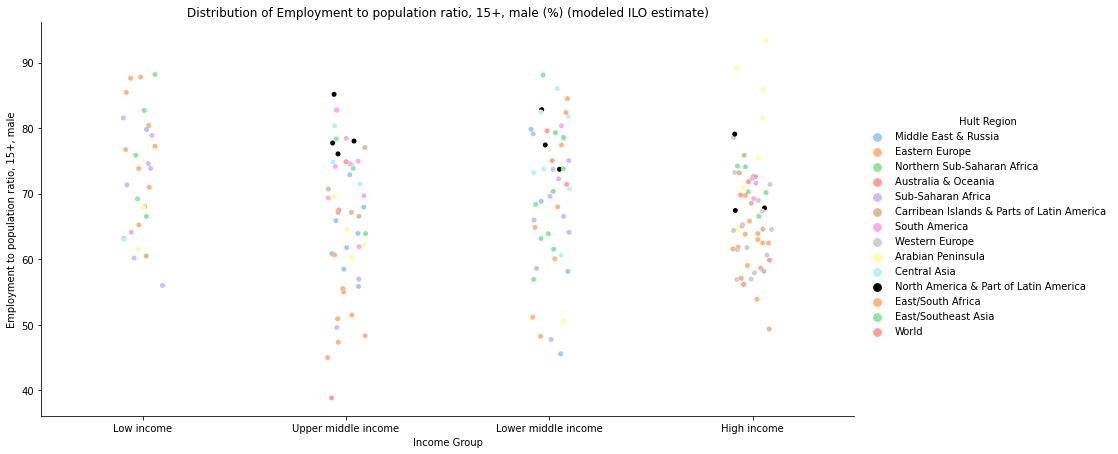

In [3]:
#  Relabel the series of columns and create a collection
series_collection = {}
series_collection = {
      'a1': ['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adolescent fertility rate'],
      'c1': ['CO2 emissions (metric tons per capita)', 'CO2 emissions'],
      'c2': ['Contributing family workers, total (% of total employment)', 'Contributing family workers, total'],
      'e1': ['Employment to population ratio, 15+, female (%) (modeled ILO estimate)', 'Employment to population ratio, 15+, female'],
      'e2': ['Employment to population ratio, 15+, male (%) (modeled ILO estimate)', 'Employment to population ratio, 15+, male'],
      'e3': ['Employment to population ratio, 15+, total (%) (modeled ILO estimate)', 'Employment to population ratio, 15+, total'],
      'e4': ['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)', 'Energy use per $1,000 GDP'],
      'f1': ['Fertility rate, total (births per woman)', 'Fertility rate'],
      'g1': ['GDP per person employed (constant 2011 PPP $)', 'GDP per person employed'],
      'g2': ['GNI per capita, Atlas method (current US$)', 'GNI per capita'],
      'i1': ['Immunization, measles (% of children ages 12-23 months)', 'Immunization, measles'],
      'i2': ['Improved sanitation facilities (% of population with access)', 'Improved sanitation facilities'],
      'i3': ['Improved water source (% of population with access)', 'Improved water source'],
      'i4': ['Internet users (per 100 people)', 'Internet users'],
      'l1': ['Life expectancy at birth, total (years)', 'Life expectancy at birth'],
      'm1': ['Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Maternal mortality ratio'],
      'm2': ['Mobile cellular subscriptions (per 100 people)', 'Mobile cellular subscriptions'],
      'm3': ['Mortality rate, infant (per 1,000 live births)', 'Mortality rate'],
      'n1': ['Net ODA received per capita (current US$)', 'Net ODA received per capita'],
      'p1': ['Population, total', 'Population, total'],
      'p2': ['Prevalence of undernourishment (% of population)', 'Prevalence of undernourishment'],
      'p3': ['Proportion of seats held by women in national parliaments (%)', 'Proportion of seats held by women in national parliaments'],
      's1': ['School enrollment, primary (% net)', 'School enrollment, primary'],
      's2': ['Self-employed, total (% of total employment)', 'Self-employed, total'],
      't1': ['Trade (% of GDP)', 'Trade (% of GDP)'],
      't2': ['Tuberculosis death rate (per 100,000 people), including HIV', 'Tuberculosis death rate']
}

# Make a scatter plots
idxcode = input("Enter y-axis feature code :  ")
if idxcode in series_collection :
    sns.set_palette(sns.color_palette("pastel"))
    sns.catplot(x         = 'Income Group',                # x-variable
                y         = series_collection[idxcode][0], # y-variable
                hue       = 'Hult Region',                 # hue
                height    = 6,                             # height
                aspect    = 2,                             # aspect
                jitter    = True,                          # jitter
                palette   = ["C0", "C1", "C2","C3","C4","C5","C6","C7","C8","C9","k","C11","C12","C13"], # change color palette
                data      = worldbank)                     # DataFrame where features exist
    # Adds a title and label
    plt.title(label = 'Distribution of ' + series_collection[idxcode][0])
    plt.ylabel(ylabel = series_collection[idxcode][1])

    # Save a image to analysis_images folders
    plt.savefig(fname = './analysis_images/scatterplot of ' + series_collection[idxcode][1] + '.png')

    plt.show()
    
else :
    print('Invalid code format')
    


<br>

---
<br>

# <b> &nbsp;Formulate a strategy for missing values </b>

<br> 
Missing values can affect the data visualization by creating a bias in the results. To find the missing value we used a two-layer strategy, firstly by finding the missing value using the mean/median.  Secondly by comparing new value (mean/median) to the actual world bank data through our research.

> <li> 	To find the missing values we started with auditing the quality of data using .info(). Going forward we counted the missing values in the dataset per column in which we found a total 6 missing values in all the columns.
    
> <li> Finding the percentage of the missing value that helps in getting to know whether we can apply the Freedman-Diaconis Rule. But we found 27% of the values were missing in s1 followed by e2, i2 and i3 at 9%.
    
> <li> Flagging the missing values: Creating a column to flag the missing values, finding the sum and value count to check the assignment of the missing values.
    
> <li> Dropping the missing values: Using the condition and creating a copy of the dataset to further drop the missing value
    
> <li> Histogram: We created a histogram using the loop to create an interactive platform for the user. We analyzed each parameter plot and the medium of each.
    
   
<br><br>

 **Audit data quality of dataset**

In [4]:
# Make a Top 5 dataset
n_america_top5 = n_america.iloc[:, [0, 1, 2, 3, 8, 15, 16, 18, 26]]

# Auditing data quality of dataset
n_america_top5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Belize to United States
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Code Total                                                    11 non-null     object 
 1   Income Group                                                          11 non-null     object 
 2   Hult Region                                                           11 non-null     object 
 3   Cool Name                                                             11 non-null     object 
 4   Employment to population ratio, 15+, male (%) (modeled ILO estimate)  10 non-null     float64
 5   Improved sanitation facilities (% of population with access)          10 non-null     float64
 6   Improved water source (% of population with access)                   10 non-null     floa

**Creating missing value flags**

In [5]:
# Creating missing value flags
for name in n_america_top5.columns :

    if n_america_top5[name].isnull().astype(int).sum() > 0:
        n_america_top5['m_'+name] = n_america_top5[name].isnull().astype(int)

<ipython-input-5-0fbe41f922ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_america_top5['m_'+name] = n_america_top5[name].isnull().astype(int)


**Drop missing values from the copied dataset so that they do not cause undue complications when generating plots**

In [6]:
# Drop missing values from the copied dataset so that they do not cause undue complications when generating plots

for col in range(4, 9) :
    # makes the new DataFrame
    globals()['df_dropped_%s' % col] = pd.DataFrame.copy(n_america.iloc[:,col])
    
    # using dropna() for df_dropped
    locals()["df_dropped_"+str(col)] = locals()["df_dropped_"+str(col)].dropna().round(2)

    # checking to see if all missing values have been dropped
    print('df_dropped_%s' % col, '----->', locals()["df_dropped_"+str(col)].isnull().sum())


df_dropped_4 -----> 0
df_dropped_5 -----> 0
df_dropped_6 -----> 0
df_dropped_7 -----> 0
df_dropped_8 -----> 0


## Develop histogram and display the plot

In [7]:
#  Relabel the series of columns and create a collection
series_collection = {}
series_collection = {
      'e2': [df_dropped_4, 'fd', 'Employment to population ratio, 15+, male (%) (modeled ILO estimate)', 'Employment to population ratio, 15+, male', worldbank.iloc[:,4], n_america_top5.iloc[:,4]],
      'i2': [df_dropped_5, 'fd', 'Improved sanitation facilities (% of population with access)', 'Improved sanitation facilities', worldbank.iloc[:,5], n_america_top5.iloc[:,5]],
      'i3': [df_dropped_6, 'fd', 'Improved water source (% of population with access)', 'Improved water source', worldbank.iloc[:,6], n_america_top5.iloc[:,6]],
      'l1': [df_dropped_7, 'fd', 'Life expectancy at birth, total (years)', 'Life expectancy at birth', worldbank.iloc[:,7], n_america_top5.iloc[:,7]],
      's1': [df_dropped_8, 'fd', 'School enrollment, primary (% net)', 'School enrollment, primary', worldbank.iloc[:,8], n_america_top5.iloc[:,8]],
}

**Develop histogram and display the plot**

<b> &emsp;To visualize, please type in the codes (e2, i2, i3, l1, s1) as above for the respective variable.</b>
   
   

Enter an Indicator code :  s1


C:\Applications\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


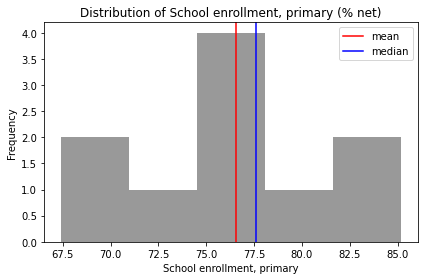

In [9]:
# Develop histogram and display the plot

idxcode = input("Enter an Indicator code :  ")
if idxcode in series_collection :
    sns.distplot(a     = series_collection[idxcode][0],
                 bins  = series_collection[idxcode][1],
                 hist  = True,
                 kde   = False,
                 rug   = False,
                 color = 'black')

    # Adds a title
    plt.title(label = 'Distribution of ' + series_collection[idxcode][2])

    # Add an x-label
    plt.xlabel(xlabel = series_collection[idxcode][3])

    # Add a y-label
    plt.ylabel(ylabel = 'Frequency')

    # Add vertical lines - Mean
    plt.axvline(x = series_collection[idxcode][0].mean(),
                color = 'red')

    # Add vertical lines - Median
    plt.axvline(x = series_collection[idxcode][0].median(),
                color = 'blue')

    # Adds a legend
    plt.legend(labels =  ['mean', 'median'])
    
    # Save a image to analysis_images folders
    plt.savefig(fname = './analysis_images/histogram of ' + series_collection[idxcode][3] + '.png')

    # these compile and display the plot so that it is formatted as expected
    plt.tight_layout()
    plt.show()

else :
    print('Invalid code format')


**Imputing values into the N/A cells**

> <li> Median: since the distribution for all the parameters appears skewed positive, the median better represents the center of this distribution. We choose the median to fill in missing values.
    
> <li> Imputing the values: The medians observed for each parameter is then compared to the valued that we obtained by searching a on different domains. Further to which we imputed values in missing value (N/A cells)
    
> <li> Imputed distribution: The aim of imputing the missing values is to create a normal distribution chart or with minimum skewness. Let us look at figure- X, we can see the imputed distribution is closer to median and displays a normal distribution. 

<b> &emsp; Key Finding:</b>
    The imputed values in the missing values are correct and creates a normal distribution. <br>
    
<b> &emsp;To visualize, please type in the codes (e2, i2, i3, l1, s1) as above for the respective variable.</b>
    
   

In [10]:
# Imputing values into the N/A cells
n_america_top5.loc['Canada']['School enrollment, primary (% net)'] = 100
n_america_top5.loc['Costa Rica']['School enrollment, primary (% net)'] = 97

# Checking to make sure NAs are filled in
print(n_america_top5.loc[:,'School enrollment, primary (% net)'].isnull().any())

True


<ipython-input-10-1bd775f88e83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_america_top5.loc['Canada']['School enrollment, primary (% net)'] = 100
<ipython-input-10-1bd775f88e83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_america_top5.loc['Costa Rica']['School enrollment, primary (% net)'] = 97


**Overlay the original and imputed distrubutions**

Enter an Indicator code :  s1


C:\Applications\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Applications\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


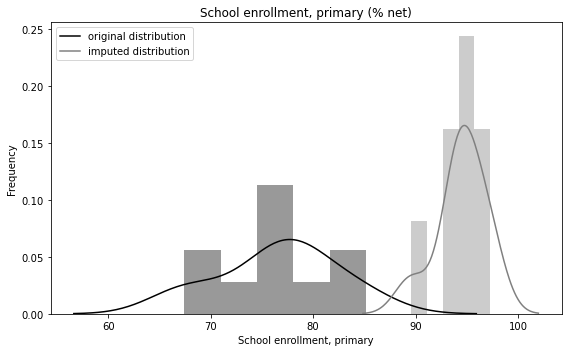

In [11]:
# Overlay the original and imputed distrubutions

# Setting figure size
fig, ax = plt.subplots(figsize = [8, 5],
                       sharex = True, # sharing x-axis between visualizations
                       sharey = True) # sharing y-axis between visualizations

idxcode = input("Enter an Indicator code :  ")
if idxcode in series_collection :
    
    # Original Distribution
    sns.distplot(a     = series_collection[idxcode][0],
                 bins  = series_collection[idxcode][1],
                 hist  = True,
                 kde   = True,   # activating kde
                 rug   = False,
                 color = 'black')
    
    # Imputed Distribution
    sns.distplot(a     = series_collection[idxcode][5],
                 bins  = series_collection[idxcode][1],
                 hist  = True,
                 kde   = True, # activating kde
                 rug   = False,
                 color = 'gray')

    # Titles, Labels
    plt.title(label   = series_collection[idxcode][2])
    plt.xlabel(xlabel = series_collection[idxcode][3])
    plt.ylabel(ylabel = 'Frequency')

    # Adds a legend
    plt.legend(labels =  ['original distribution',
                          'imputed distribution'])

    # Save a image to analysis_images folders
    plt.savefig(fname = './analysis_images/overlay_histogram of ' + series_collection[idxcode][3] + '.png')
    
    # These compile and display the plot so that it is formatted as expected
    plt.tight_layout()
    plt.show()

else :
    print('Invalid code format')

**Saving the new dataset to Excel**

In [12]:
# Saving the new dataset to Excel
n_america_top5.to_excel(excel_writer = "./saved_datasets/Team_12_dataset_imputed.xlsx",
                        sheet_name = 'Data_imputed',
                        index = False)

<br>

---
<br>

# <b> Identifying potential outliers </b>

<br> The strategy we used for identifying outliers is as following, 
•	We created a standard boxplot for a single quantitive feature for ‘The North America & Part of Latin America’. 
•	Annotated the outlier threshold with a vertical line.
•	Flag potential outliers with a column of 1 and 0, 1 being equal to potential outliers.
•	Check that the result for the code imputed before was correct.
•	Lastly saving the new dataset to Excel.
Following this strategy we identified 2 columns where there are potential outliers. The first one being the employment to population ratio, 15+, male (%) (modeled ILO estimate) whose indicator code  is e2. The second outlier found was school enrollment, primary which indicator code is s1. 



&emsp; <b> Explain your strategy for identifying outliers.
<br><br> </b>

&emsp; Making process
> <li> Output a standard boxplot for a single quantitative feature for 'The North America & Part of Latin America' 
> <li> Annotate outlier threshold with a vertical line 
> <li> Flag potential outliers with a column of ones and zeros (1 == potential outlier)
> <li> Checking the results of the code above 
> <li> Saving the new dataset to Excel </li>


<p> &ensp; We identify 2 columns where potential outliers are existed. </p>

> <li> Employment to population ratio, 15+, male (%) (modeled ILO estimate) - label name e2
> <li> School enrollment, primary (% net) - s1

**Output a standard boxplot for a single quantitative feature for 'The North America & Part of Latin America'**

Enter Indicator code :  e2


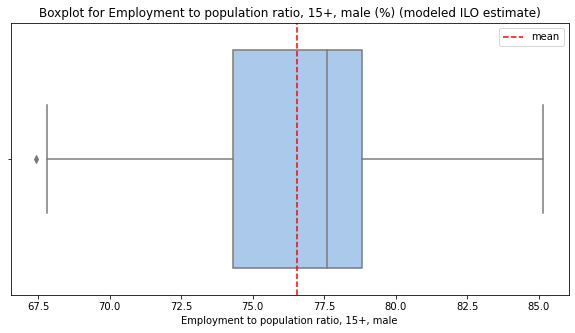

In [13]:
# Output a standard boxplot for a single quantitative feature

# Set vertical lines for outlier threshold

# Setting figure size
fig, ax = plt.subplots(figsize = (10, 5))

idxcode = input("Enter Indicator code :  ")
if idxcode in series_collection :
    # Developing a boxplot
    sns.boxplot(x      = series_collection[idxcode][5],  # x-variable
                y      = None,                           # optional y-variable
                hue    = None,                           # optional categorical feature
                orient = 'h',                            # horizontal or vertical
                data   = n_america)                      # DataFrame where features exist

    # Add a title
    plt.title(label = 'Boxplot for ' + series_collection[idxcode][2])

    # Add vertical lines for mean
    plt.axvline(x = series_collection[idxcode][5].mean(), label = 'mean',
                linestyle = '--', color = 'red')

    # Add a legend
    plt.legend(loc='upper right')

    # Add an x-label
    plt.xlabel(xlabel = series_collection[idxcode][3])
    
    # Save a image to analysis_images folders
    plt.savefig(fname = './analysis_images/boxplot of ' + series_collection[idxcode][3] + '.png')

    # formatting and displaying the plot
    plt.show()

else :
    print('Invalid code format')


**Annotate outlier threshold with a vertical line**

Enter Indicator code :  e2


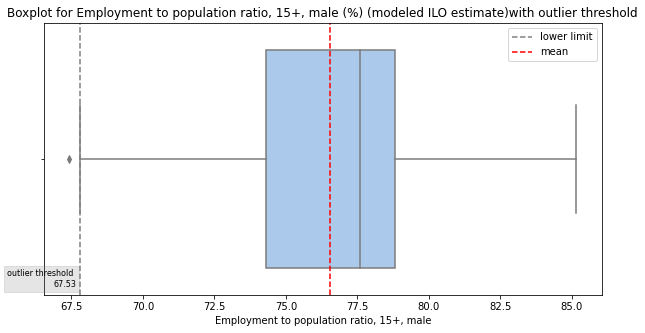

In [14]:
# Annotate outlier threshold with a vertical line

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))

idxcode = input("Enter Indicator code :  ")
if idxcode in series_collection :
    # Developing a boxplot
    sns.boxplot(x      = series_collection[idxcode][5],  # x-variable
                y      = None,     # optional y-variable
                hue    = None,     # optional categorical feature
                orient = 'h',      # horizontal or vertical
                data   = n_america_top5) # DataFrame where features exist

    # Add a title
    plt.title(label = 'Boxplot for ' + series_collection[idxcode][2] + 'with outlier threshold')

    # Compute lower limit
    lower_limit = series_collection[idxcode][5].quantile(0.25) \
                  - 1.5 * (series_collection[idxcode][5].quantile(0.75) - series_collection[idxcode][5].quantile(0.25))

    # Annotate outlier threshold

    if 'e2' in idxcode :
        plt.text(67.8 * 0.998, 0.47, f'outlier threshold \n{lower_limit.round(decimals = 2)}', fontsize = 8,
                  bbox={'facecolor': 'gray', 'edgecolor': 'gray', 'alpha': 0.2, 'pad': 3}, ha = 'right');
        plt.axvline(x = 67.8, label = 'lower limit', linestyle = '--', color = 'gray')
    elif 's1' in idxcode :
        plt.text(91.11 * 0.9991, 0.47, f'outlier threshold \n{lower_limit.round(decimals = 2)}', fontsize = 8,
                  bbox={'facecolor': 'gray', 'edgecolor': 'gray', 'alpha': 0.2, 'pad': 3}, ha = 'right');
        plt.axvline(x = 91.11, label = 'lower limit', linestyle = '--', color = 'gray')
    else :
        pass        

    # Add vertical lines for mean
    plt.axvline(x = series_collection[idxcode][5].mean(), label = 'mean',
                linestyle = '--', color = 'red')
    
    # Add a legend
    plt.legend(loc='upper right')

    # Add an x-label
    plt.xlabel(xlabel = series_collection[idxcode][3])
    
    # Save a image to analysis_images folders
    plt.savefig(fname = './analysis_images/boxplot of ' + series_collection[idxcode][3] + ' with outlier threshold.png')

    # formatting and displaying the plot
    plt.show()

else :
    print('Invalid code format')

<br>

---
<br>

# <b> Select an "On average" country </b>

<p> &emsp; After we rank the values per columns, we will find the average range numbers (5 or 6 / 0.5 or 0.6) on the heatmap plot.</p>

<br>
To select which country best represents are region on average first 
we ranked the numeric data among the North America & Part of Latin America region. 
With these values we developed a heat map to have a clear view of how each 
region ranked on average in our top five categories and shows that 
the average between the regions is 6. Thus, making it clear that Mexico has 
the most common average values. Mexico is considered 
an upper middle-income country with a general trading system and 
a consolidated central government. 

<p>
<br>
Their data in the top 5 columns chosen is as follows: <br>


<div style = "width:image width px; font-size:80%; text-align:center;"><img src="./images/Image_Average%20.png" width="600" height= "600" style="padding-bottom:0.5em;"> <em>Table 1: Average by Country (%) </em></div>

## *For 'The North America & Part of Latin America' region*

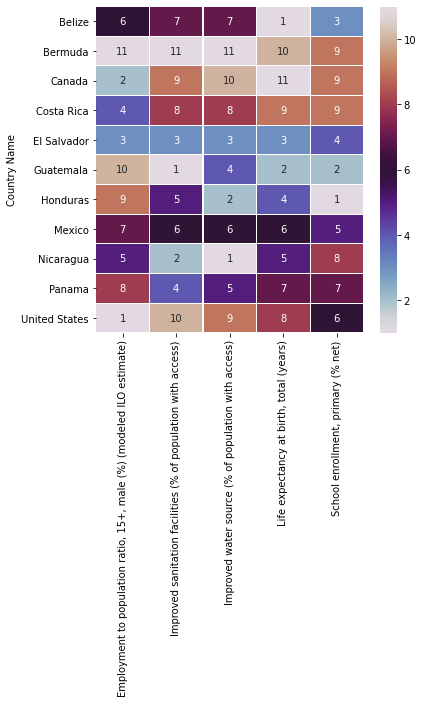

In [15]:
## Rank the numeric data among America regions
region_rank = n_america_top5.iloc[:, 4:9].rank(axis = 0, method='min', ascending=True, na_option='bottom')

# Develop a heatmap
f, ax = plt.subplots(figsize =(6, 6)) 
sns.heatmap(region_rank, ax = ax, cmap ="twilight", linewidths = 0.1, annot= True) 

# Save a image to analysis_images folders
plt.savefig("./analysis_images/rank_heatmap_region_n-america.png") 

plt.show()

## *Conclusion*

<br>
Our analysis of the world bank data used descriptive statistics and data visualization to get insights from the large data and narrow it down to 5 top columns that makes NALA a unique region among the worlds.
Imputing the missing value provided us insights on Bermuda as a country and the imputed distribution was less skewed than before which tells yes the imputation actually improved the distribution curve. 
In conclusion, we determined that Mexico was our best ‘average’ representation of our regions due to the findings of our analysis.
<br>
<br>
<br>
Our data indicates that Mexico has a fair mix of Latin America and North America characteristics. As with the correlation between countries and 5 parameters, Mexico is the country with most middle correlation.  
Also Mexico is in a unique position as a country because historically they benefitted from the previous North American Free Trade Agreement which allowed them to trade with Canada and The US with reduced or no 
tariffs on certain goods. Although the NAFTA has been dissolved between the three nations there are still trade agreements between them which continue to economically benefit all involved compared to when a 
country from outside of the region tried to do business with them.<br>
<br>

<br>
Considering the world data in relation to our own we noticed a trend that countries with a high life expectancy are also countries with Middle to High GDP Capita country. Three countries in our dataset appear to align with this hypothesis, Bermuda, Canada, and The United States. Though initially Costa Rica seems to be an anomaly as a Low GDP per capita country with a higher life expectancy than The United States but this can be attributed to the government funded national healthcare insurance scheme that covers and is accessible to majority of the population.
Beyond that most of our data was in line with the region and gave us a fairly accurate insight into the characteristics of our region.
<br>

<div style = "width:image width px; font-size:80%; text-align:center;"><img src="./images/Mexico.jpeg" width="800" height="800" style="padding-bottom:0.5em;"> <em>Figure 3: Mexico City </em></div>